In [ ]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
import joblib

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pranavtheking007/Nidan-2.0/main/Student%20Mental%20health.csv')

In [ ]:
df.tail()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Fill missing numeric valuees with median
            df[label] = content.fillna(content.median())

In [ ]:
df['What is your course?'].value_counts()

BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [ ]:
df['Choose your gender'].value_counts()

Female    75
Male      26
Name: Choose your gender, dtype: int64

In [ ]:
Others = list(df['What is your course?'].unique())
Others

['Engineering',
 'Islamic education',
 'BIT',
 'Laws',
 'Mathemathics',
 'Pendidikan islam',
 'BCS',
 'Human Resources',
 'Irkhs',
 'Psychology',
 'KENMS',
 'Accounting ',
 'ENM',
 'Marine science',
 'KOE',
 'Banking Studies',
 'Business Administration',
 'Law',
 'KIRKHS',
 'Usuluddin ',
 'TAASL',
 'Engine',
 'ALA',
 'Biomedical science',
 'koe',
 'Kirkhs',
 'BENL',
 'Benl',
 'IT',
 'CTS',
 'engin',
 'Econs',
 'MHSC',
 'Malcom',
 'Kop',
 'Human Sciences ',
 'Biotechnology',
 'Communication ',
 'Diploma Nursing',
 'Pendidikan Islam ',
 'Radiography',
 'psychology',
 'Fiqh fatwa ',
 'DIPLOMA TESL',
 'Koe',
 'Fiqh',
 'Islamic Education',
 'Nursing ',
 'Pendidikan Islam']

In [ ]:
Others.remove('BCS')
Others.remove('Engineering')
Others.remove('BIT')
Others.remove('KOE')

In [ ]:
df.replace(to_replace=Others,
           value="Others",
           inplace=True)

In [ ]:
df.drop('Marital status',axis=1,inplace=True)
df.drop('Timestamp',axis=1,inplace=True)

In [ ]:
df['What is your course?']

0      Engineering
1           Others
2              BIT
3           Others
4           Others
          ...     
96             BCS
97     Engineering
98          Others
99          Others
100         Others
Name: What is your course?, Length: 101, dtype: object

In [ ]:
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,Yes,No,Yes,No
1,Male,21.0,Others,year 2,3.00 - 3.49,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,Yes,Yes,Yes,No
3,Female,22.0,Others,year 3,3.00 - 3.49,Yes,No,No,No
4,Male,23.0,Others,year 4,3.00 - 3.49,No,No,No,No


<Axes: >

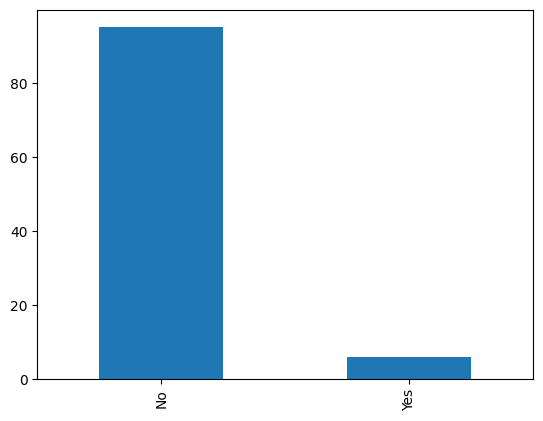

In [ ]:
df['Did you seek any specialist for a treatment?'].value_counts().plot(kind='bar')

<Axes: >

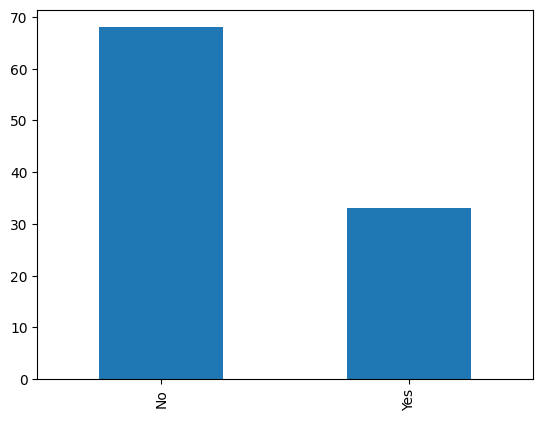

In [ ]:
df['Do you have Panic attack?'].value_counts().plot(kind='bar')

<Axes: >

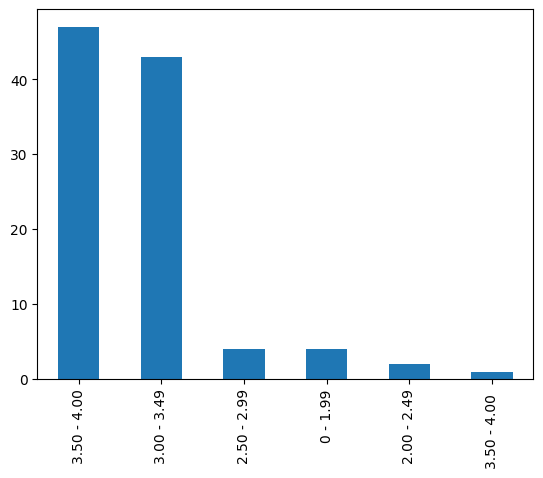

In [ ]:
df['What is your CGPA?'].value_counts().plot(kind='bar')

<Axes: >

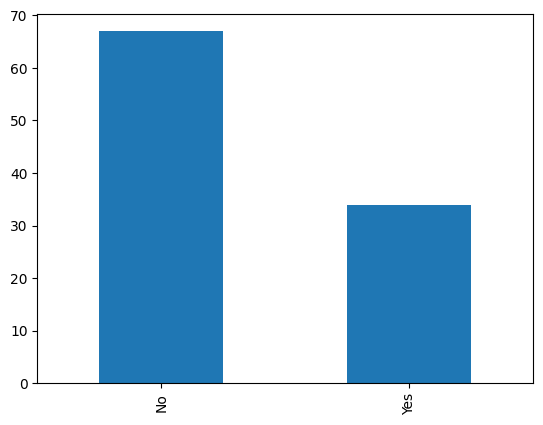

In [ ]:
df['Do you have Anxiety?'].value_counts().plot(kind='bar')

<Axes: >

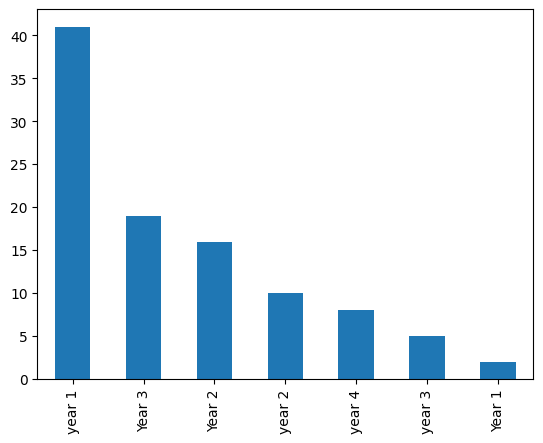

In [ ]:
df['Your current year of Study'].value_counts().plot(kind='bar')

In [ ]:
Years = list(df['Your current year of Study'].unique())
Years,len(Years)

(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3'], 7)

In [ ]:
for i in range(1,5):
  df.replace(to_replace=[f'year {i}', f'Year {i}'],
            value=f"Year {i}",
             inplace=True)

In [ ]:
Years = list(df['Your current year of Study'].unique())
Years,len(Years)

(['Year 1', 'Year 2', 'Year 3', 'Year 4'], 4)

In [ ]:
Y = df['Do you have Depression?']
X=df.drop('Do you have Depression?',axis=1)

<Axes: >

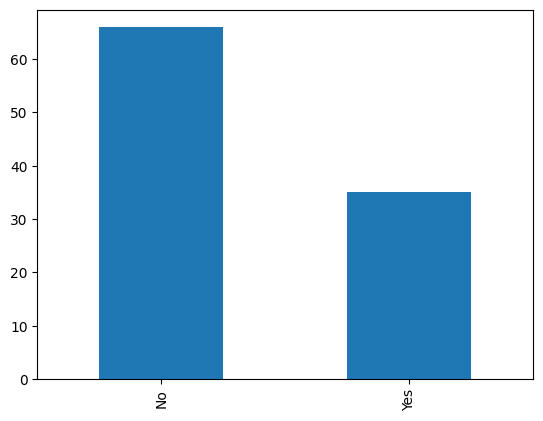

In [ ]:
Y.value_counts().plot(kind='bar')

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.columns

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

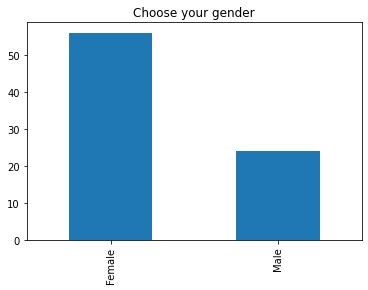

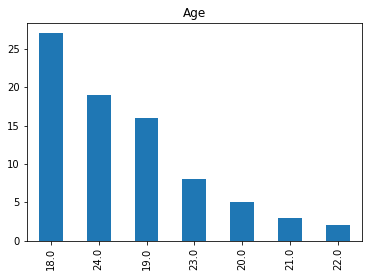

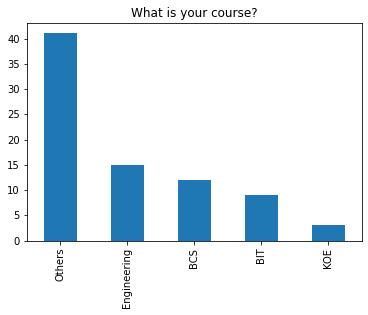

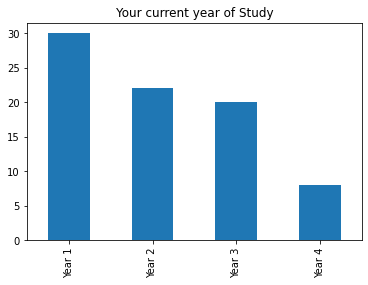

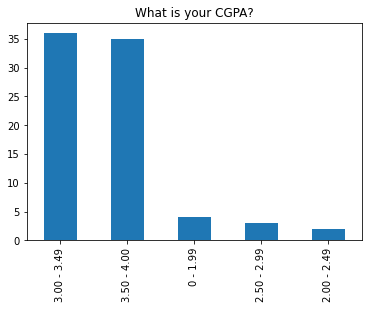

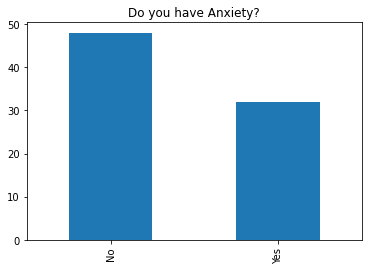

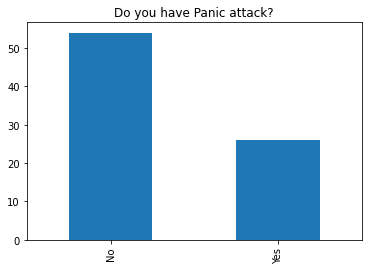

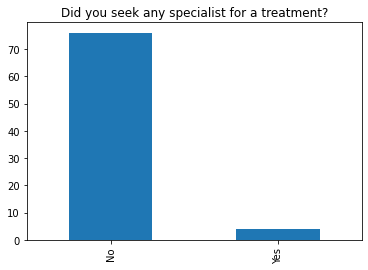

In [ ]:
for i in X_train.columns:
  X_train[f'{i}'].value_counts().plot(kind='bar')
  plt.title(i)
  plt.show()

<Axes: >

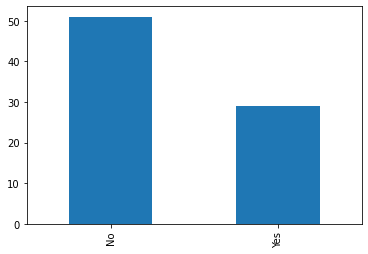

In [ ]:
Y_train.value_counts().plot(kind='bar')

In [ ]:
Columns = list(X_train.columns)
Columns

['Choose your gender',
 'Age',
 'What is your course?',
 'Your current year of Study',
 'What is your CGPA?',
 'Do you have Anxiety?',
 'Do you have Panic attack?',
 'Did you seek any specialist for a treatment?']

In [ ]:
Columns.remove('Age')

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['Age']),
    (OneHotEncoder(handle_unknown='ignore'),Columns))

In [ ]:
list(X_train.Columns)

['Choose your gender',
 'Age',
 'What is your course?',
 'Your current year of Study',
 'What is your CGPA?',
 'Do you have Anxiety?',
 'Do you have Panic attack?',
 'Did you seek any specialist for a treatment?']

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(), ['Age']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Choose your gender', 'What is your course?',
                                  'Your current year of Study',
                                  'What is your CGPA?', 'Do you have Anxiety?',
                                  'Do you have Panic attack?',
                                  'Did you seek any specialist for a '
                                  'treatment?'])])

In [ ]:
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
Y_trains = []

for i in Y_train:
  if i =='Yes':
    Y_trains.append(1)
  else:
    Y_trains.append(0)

In [ ]:
Y_tests = []

for i in Y_test:
  if i =='Yes':
    Y_tests.append(1)
  else:
    Y_tests.append(0)

In [ ]:
# create model instance
bst = xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train_ct, Y_trains)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(subsample= 0.8,
 scale_pos_weight= 5,
 reg_lambda= 1,
 max_depth= 5,
 learning_rate= 0.01,
 gamma= 1,
 colsample_bytree= 0.5)

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy",verbose=2)

# Fit
grid_cv.fit(X_train_ct, Y_trains)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=1, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40),
                         'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='accuracy', verbose=2)

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'max_depth': 2,
 'n_estimators': 60,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
xgb_cl =  xgb.XGBClassifier(colsample_bytree = 0.5,
 gamma = 0,
 max_depth= 8,
 n_estimators= 140,
 reg_lambda = 0,
 scale_pos_weight = 5,
 subsample = 0.8)

xgb_cl.fit(X_train_ct,Y_trains)
Y_preds = xgb_cl.predict(X_test_ct)

In [ ]:
accuracy_score(Y_tests,Y_preds)

0.5714285714285714

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#Different HyperParameters
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,10,2),
          "min_samples_leaf":np.arange(1,10,2),
          "max_features":[0.5,1,"sqrt",'log2']}

#Instatantiate Randomised Search CV
rs_model = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
                             param_grid=rf_grid,
                             cv=5,
                             verbose=2,
                        return_train_score=True)
rs_model.fit(X_train_ct,Y_trains)

Streaming output truncated to the last 5000 lines.
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'max_features': [0.5, 1, 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             return_train_score=True, verbose=2)

In [ ]:
rs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
rf_cl = RandomForestClassifier(n_jobs=-1,
                       random_state=42,
                       max_depth= 5,
                       max_features= 'sqrt',
                       min_samples_leaf= 1,
                       min_samples_split= 8,
                       n_estimators= 60)

rf_cl.fit(X_train_ct,Y_trains)

RandomForestClassifier(max_depth=5, min_samples_split=8, n_estimators=60,
                       n_jobs=-1, random_state=42)

In [ ]:
Y_preds_rf = rf_cl.predict(X_test_ct)
accuracy_score(Y_tests,Y_preds_rf)

0.7619047619047619

In [ ]:
#Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver":['newton-cg','liblinear','saga'],
               'penalty':['l1','l2','elasticnet']}

In [ ]:
np.random.seed(42)

#Tune logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          return_train_score=True)

In [ ]:
lr=LogisticRegression()
gs_log_reg.fit(X_train_ct,Y_trains)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'liblinear', 'saga']},
             return_train_score=True, verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
lr = LogisticRegression(C=4.281332398719396, penalty= 'l1', solver='liblinear')

In [ ]:
lr.fit(X_train_ct,Y_trains)

LogisticRegression(C=4.281332398719396, penalty='l1', solver='liblinear')

In [ ]:
Y_preds_lr = lr.predict(X_test_ct)
accuracy_score(Y_tests,Y_preds_lr)

0.7619047619047619

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_ct,Y_trains)
Y_preds_lr1 = lr1.predict(X_test_ct)
accuracy_score(Y_tests,Y_preds_lr1)

0.8095238095238095

In [ ]:
print(classification_report(Y_tests,Y_preds_lr1))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.75      0.50      0.60         6

    accuracy                           0.81        21
   macro avg       0.79      0.72      0.74        21
weighted avg       0.80      0.81      0.80        21



In [ ]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_preds):
    #Creating Heatmap of Confusion matrix"
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

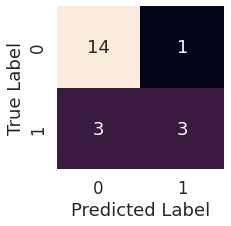

In [ ]:
plot_confusion(Y_tests,Y_preds_lr1)

In [ ]:
print(classification_report(Y_tests,Y_preds_rf))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.67      0.33      0.44         6

    accuracy                           0.76        21
   macro avg       0.72      0.63      0.65        21
weighted avg       0.75      0.76      0.73        21



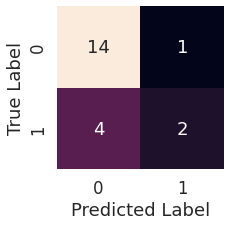

In [ ]:
plot_confusion(Y_tests,Y_preds_rf)

In [ ]:
joblib.dump(rf_cl, 'Mental_Student.joblib')

['Mental_Student.joblib']